# Homework 5 Code

In [ ]:
# Add import statements here
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
from scipy.spatial import Voronoi, voronoi_plot_2d
import math

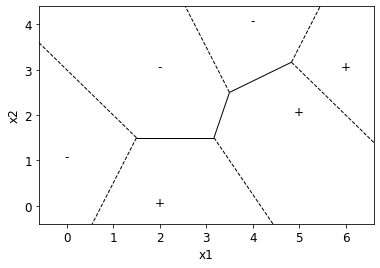

In [ ]:
#Code for Question 1
#Part A, original data
data = np.array([[2,0],[5,2],[6,3],[0,1],[2,3],[4,4]]);
vor = Voronoi(data);
fig = voronoi_plot_2d(vor,show_points=False,show_vertices=False);
plt.annotate("+",(2,0),xytext=(2,0),textcoords="data",ha='center');
plt.annotate("+",(5,2),xytext=(5,2),textcoords="data",ha='center');
plt.annotate("+",(6,3),xytext=(6,3),textcoords="data",ha='center');
plt.annotate("-",(0,1),xytext=(0,1),textcoords="data",ha='center');
plt.annotate("-",(2,3),xytext=(2,3),textcoords="data",ha='center');
plt.annotate("-",(4,4),xytext=(4,4),textcoords="data",ha='center');
plt.rcParams.update({'font.size': 12})
plt.xlabel("x1")
plt.ylabel("x2")
plt.show();

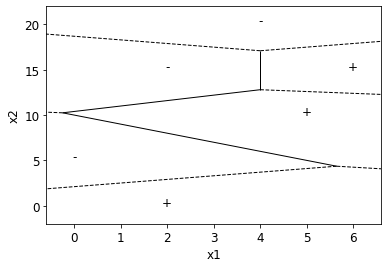

In [ ]:
#Question 1 Part B
data = np.array([[2,0],[5,10],[6,15],[0,5],[2,15],[4,20]]);
vor = Voronoi(data);
fig = voronoi_plot_2d(vor,show_points=False,show_vertices=False);
plt.annotate("+",(2,0),xytext=(2,0),textcoords="data",ha='center');
plt.annotate("+",(5,10),xytext=(5,10),textcoords="data",ha='center');
plt.annotate("+",(6,15),xytext=(6,15),textcoords="data",ha='center');
plt.annotate("-",(0,5),xytext=(0,5),textcoords="data",ha='center');
plt.annotate("-",(2,15),xytext=(2,15),textcoords="data",ha='center');
plt.annotate("-",(4,20),xytext=(4,20),textcoords="data",ha='center');
plt.xlabel("x1")
plt.ylabel("x2")
plt.show();

In [ ]:
# To test if the above block worked, run this block
!ls '/content/gdrive/My Drive/washu/cse417t/CSV_Files'

ls: cannot access '/content/gdrive/My Drive/washu/cse417t/CSV_Files': No such file or directory


## Neural Network

The `neural_network` function creates a model that learns to classify handwritten digits.

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels

Outputs: 
* `test_loss` is the loss after evaluating the testing dataset
* `test_acc` is the accuracy after evaluating the testing dataset
* `predictions` are the models predictions of the testing dataset

Note: Have fun and be creative with this assignment!


In [ ]:
def neural_network(x_train, y_train, x_test, y_test):
  # Implement model
  model = tf.keras.Sequential()
  #Initial layer to flatten input
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(784,activation="relu"))
  model.add(tf.keras.layers.Dense(784,activation="relu"))
  model.add(tf.keras.layers.Dense(10,activation=None))
  # Feel free to change this up, but leave it at first
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  # Fit and evaluate
  model.fit(np.asarray(x_train),np.asarray(y_train))
  model.evaluate(np.asarray(x_test), np.asarray(y_test))

In [ ]:
def neural_networkPred(x_train, y_train, x_test, y_test):
  # Implement model
  model = tf.keras.Sequential()
  #Initial layer to flatten input
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(784,activation="relu"))
  model.add(tf.keras.layers.Dense(10,activation=None))
  model.add(tf.keras.layers.Softmax())
  # Feel free to change this up, but leave it at first
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  # Fit and evaluate
  model.fit(np.asarray(x_train),np.asarray(y_train))
  return model.predict(np.asarray(x_test))

## Run and Plot

Run your neural network code and plot figures below

In [ ]:
# Other neural network code here:
# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
pred = neural_networkPred(x_train, y_train, x_test, y_test)
# Line below used for part b of the assignment
# neural_network(x_train,y_train,x_test,y_test)


1875/1875 [==============================] - 3s 1ms/step - loss: 1.7798 - accuracy: 0.7231


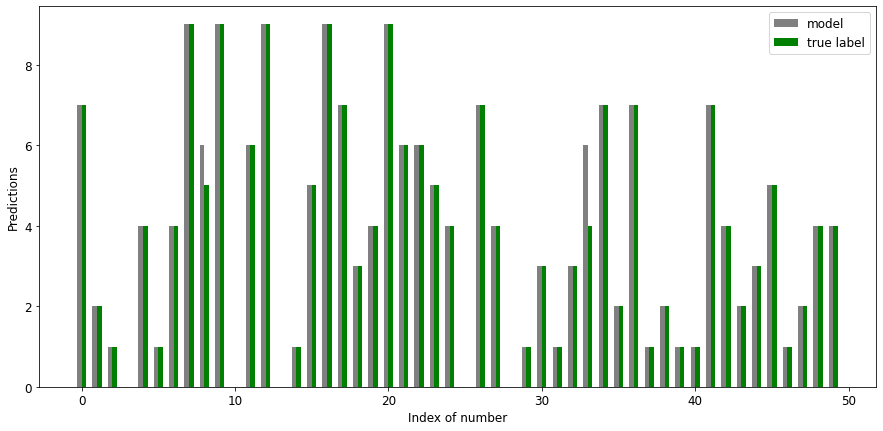

In [ ]:
#Question 4 Part C
counter = 0
a = np.zeros(0)
while counter < 50:
  a = np.append(a,np.argmax(pred[counter]))
  counter +=1
x = np.arange(0,50,1)
width = 0.3
plt.figure(figsize = (15,7))
b=plt.bar(x-width/2, a, width, color = "grey", label = "model")
c=plt.bar(x+width/2,y_test[0:50], width, color="green", label = "true label")
plt.xlabel("Index of number")
plt.ylabel("Predictions")
plt.legend()
plt.show()

(28, 28)


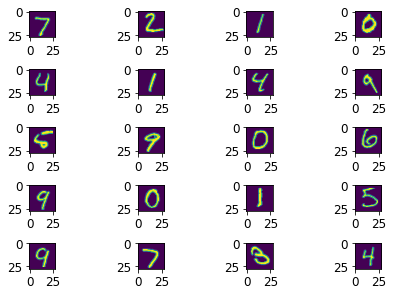

In [ ]:
# Print out the first 25 images
fig1, f1_axes = plt.subplots(ncols=4, nrows=5, constrained_layout=True)
counter = 0
print(x_train[0].shape)
for ax in f1_axes.reshape(-1):
  ax.imshow(x_test[counter])
  counter += 1

## Random Forest

The `random_forest` function learns an ensemble of numBags CART decision trees using a random subset of the features at each split on the input dataset and also plots the  out-of-bag error as a function of the number of bags

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels
* `num_bags` is the number of trees to learn in the ensemble
* `m` is the number of randomly selected features to consider at each split

Outputs: 
* `out_of_bag_error` is the out-of-bag classification error of the final learned ensemble
* `test_error` is the classification error of the final learned ensemble on test data

Note: You may use sklearns 'DecisonTreeClassifier' but **not** 'RandomForestClassifier' or any other bagging function



In [ ]:
# To access files in your Google Drive, run this block and follow the instructions
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# open train data
data35 = np.zeros(257)
data13 = np.zeros(257)
#CSV reader now reads everything in as a float rather than Strings
with open('/content/gdrive/My Drive/washu/cse417t/CSV_Files/zip_train.csv', 'r', encoding='utf-8-sig') as csvfile:
  reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)

  for row in reader:
    y = row[0]
    if (y == 1):
      row[0] = 1
      data13 = np.vstack((data13,np.array(row)))
    if (y == 3):
      row [0] = -1
      data13 = np.vstack((data13,np.array(row)))
      data35 = np.vstack((data35,np.array(row)))
    if (y == 5):
      row[0] = 1
      data35 = np.vstack((data35,np.array(row)))

In [ ]:
# open test data
data35_test = np.zeros(257)
data13_test = np.zeros(257)
#CSV reader now reads everything in as a float rather than Strings
with open('/content/gdrive/My Drive/washu/cse417t/CSV_Files/zip_test.csv', 'r', encoding='utf-8-sig') as csvfile:
  reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)

  for row in reader:
    y = row[0]
    if (y == 1):
      row[0] = 1
      data13_test = np.vstack((data13_test,np.array(row)))
    if (y == 3):
      row[0] = -1
      data13_test = np.vstack((data13_test,np.array(row)))
      data35_test = np.vstack((data35_test,np.array(row)))
    if (y == 5):
      row[0] = 1
      data35_test = np.vstack((data35_test,np.array(row)))

In [ ]:
# Process the training and testing data
data13 = np.delete(data13,0,0)
data13_test = np.delete(data13_test,0,0)
data13_test = np.hsplit(data13_test,[1])
data35 = np.delete(data35,0,0)
data35_test = np.delete(data35_test,0,0)
data35_test = np.hsplit(data35_test,[1])

In [ ]:
def sample13Data(m):
  counter = 0
  x = np.zeros(2)
  y=np.zeros(1)
  bag = np.random.choice(data13.shape[0],m,replace=True)
  data = np.hsplit(data13[bag,:],[1])
  return data
def sample35Data(m):
  counter = 0
  x = np.zeros(2)
  y=np.zeros(1)
  bag = np.random.choice(data35.shape[0],m,replace=True)
  data = np.hsplit(data35[bag,:],[1])
  data[0]=data[0].flatten()
  return data
def testError(predictions, answer):
  counter = 0
  error = 0;
  while counter < answer.shape[0]:
    if (predictions[counter] != answer[counter]):
      error+=1
    counter += 1
  return error/answer.shape[0]

def random_forest13(num_bags,m):
  # Your code here, assign the proper values to out_of_bag_error and test_error:
  all_predictions = np.zeros(data13_test[0].shape[0])
  oob = np.zeros((num_bags, data13.shape[0]))
  storeY = np.zeros(data13.shape[0])
  storeX = np.zeros((1,data13.shape[0],256))
 # Generating all bags of data for training and oob error
  for i in range(num_bags):
    (trainingY, trainingX) = sample13Data(m)
    storeY = np.vstack((storeY, trainingY.flatten()))
    storeX = np.append(storeX, trainingX[np.newaxis,:,:],axis=0)
  storeY = np.delete(storeY, 0,0)
  storeX = np.delete(storeX, 0,0)
  # Generating individual decision trees, predict its out of bag contribution to other data sets,
  for i in range(num_bags):
    clf = DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(storeX[i], storeY[i])
    counter = 0
    while counter < num_bags:
      if counter != i:
        oob_pred = clf.predict(storeX[counter])
        oob[counter] += oob_pred
      counter+=1
    pred = clf.predict(data13_test[1])
    all_predictions += pred
  oob = np.sign(oob)
  counter = 0
  e_oob = 0
  while counter < num_bags:
    e_oob +=  np.sum(-1*(np.equal(oob[counter],storeY[counter])-1))/data13.shape[0]
    counter+=1
  return (e_oob/num_bags,testError(np.sign(all_predictions), data13_test[0]))

In [ ]:
def random_forest35(num_bags,m):
  # Your code here, assign the proper values to out_of_bag_error and test_error:
  all_predictions = np.zeros(data35_test[0].shape[0])
  oob = np.zeros((num_bags, data35.shape[0]))
  storeY = np.zeros(data35.shape[0])
  storeX = np.zeros((1,data35.shape[0],256))
 # Generating all bags of data for training and oob error
  for i in range(num_bags):
    (trainingY, trainingX) = sample35Data(m)
    storeY = np.vstack((storeY, trainingY.flatten()))
    storeX = np.append(storeX, trainingX[np.newaxis,:,:],axis=0)
  storeY = np.delete(storeY, 0,0)
  storeX = np.delete(storeX, 0,0)
  
  # Generating individual decision trees, predict its out of bag contribution to other data sets,
  for i in range(num_bags):
    clf = DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(storeX[i], storeY[i])
    counter = 0
    while counter < num_bags:
      if counter != i:
        oob_pred = clf.predict(storeX[counter])
        oob[counter] += oob_pred
      counter+=1
    pred = clf.predict(data35_test[1])
    all_predictions += pred
  oob = np.sign(oob)
  counter = 0
  e_oob = 0
  while counter < num_bags:
    e_oob +=  np.sum(-1*(np.equal(oob[counter],storeY[counter])-1))/data35.shape[0]
    counter+=1
  return (e_oob/num_bags,testError(np.sign(all_predictions), data35_test[0]))

## Run and Plot

Run your random forest code and plot figures below

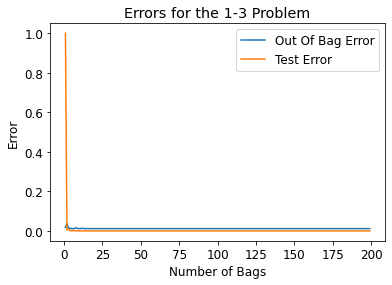

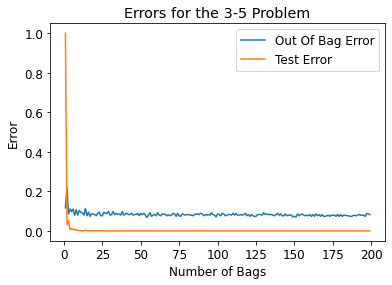

In [94]:
# Other random forest code here:
counter = 0
x = np.arange(1,100,step=1)
eTest13 = np.zeros(0)
eOob13 = np.zeros(0)
eTest35 = np.zeros(0)
eOob35 = np.zeros(0)
for i in x:
  (t, o) = random_forest13(i,data13.shape[0])
  (a,b) = random_forest35(i,data35.shape[0])
  eTest13 = np.append(eTest13,t)
  eOob13 = np.append(eOob13,o)
  eTest35 = np.append(eTest35,a)
  eOob35 = np.append(eOob35,b)
  print(i)
plt.xlabel("Number of Bags")
plt.ylabel("Error")
plt.plot(x,eOob13,label="Out Of Bag Error")
plt.plot(x,eTest13,label="Test Error")
plt.title("Errors for the 1-3 Problem")
plt.legend()
plt.show()
plt.title("Errors for the 3-5 Problem")
plt.xlabel("Number of Bags")
plt.ylabel("Error")
plt.plot(x,eOob35,label="Out Of Bag Error")
plt.plot(x,eTest35, label = "Test Error")
plt.legend()
plt.show()